In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

In [31]:
def exp_func(x, a, b, c, d):
    return a * np.exp(b * (x-c)) + d

In [75]:
# directoryname = "AGC_test/082625_AGCtest_1dB/"
filename = "thresh_scan_fine2.csv"

In [76]:
thresholds = {}
scalers = {}
subscalers = {}

with open(filename, 'r') as infile:
    first=True
    for line in infile:
        if(first):
            first=False
            continue
        parsed_line = line.strip().split(",")
        tio = int(parsed_line[0])
        slot = int(parsed_line[1])
        beam = int(parsed_line[2])
        threshold = int(parsed_line[3])
        scaler = int(parsed_line[4])
        subscaler = int(parsed_line[5])
        if(not slot in thresholds.keys()):
            thresholds[slot] = {}
            scalers[slot] = {}
            subscalers[slot] = {}
        if(not beam in thresholds[slot].keys()):
            thresholds[slot][beam] = []
            scalers[slot][beam] = []
            subscalers[slot][beam] = []
        thresholds[slot][beam].append(threshold)
        scalers[slot][beam].append(scaler)
        subscalers[slot][beam].append(subscaler)
        

10600.0


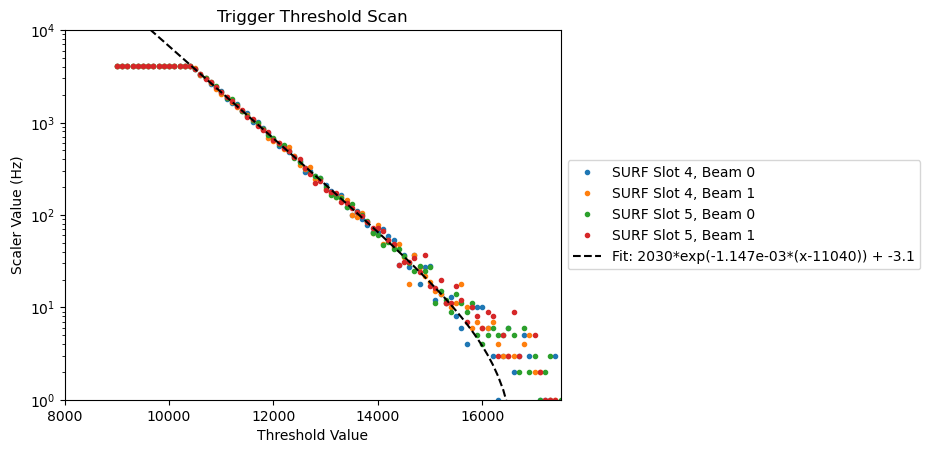

In [79]:
all_threshs = np.array([])
all_scalers = np.array([])
for slot, beam, label in [(4, 0, "SURF Slot 4, Beam 0"),
                          (4, 1, "SURF Slot 4, Beam 1"),
                          (5, 0, "SURF Slot 5, Beam 0"),
                          (5, 1, "SURF Slot 5, Beam 1")]:
    x = np.array(thresholds[slot][beam])
    y = np.array(scalers[slot][beam])
    all_threshs = np.concat((all_threshs,x))
    all_scalers = np.concat((all_scalers,y))
    # Only fit where y > 0 to avoid log issues
    mask = (y > 0)
    plt.plot(x[mask], y[mask], linestyle="None", marker=".", label=label)
x = np.array(all_threshs)
y = np.array(all_scalers)
# Only fit where y > 0 to avoid log issues
mask = (y > 0) & (x > 10500) & (x < 16500)
popt, _ = curve_fit(exp_func, x[mask], y[mask], p0=(1000, -0.001, 10000, 0))
plt.plot(thresholds[slot][beam], exp_func(thresholds[slot][beam], *popt), linestyle='--', color='k', label=f"Fit: {popt[0]:0.0f}*exp({popt[1]:0.3e}*(x-{popt[2]:0.0f})) + {popt[3]:0.1f}")
print(x[mask][0])
plt.xlim(8000, 17500)
plt.ylim(1,10**4)
plt.yscale("log")
plt.title("Trigger Threshold Scan")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside right
plt.savefig("threshold_scan_20250902_fine2.png",  bbox_inches='tight')
plt.show()

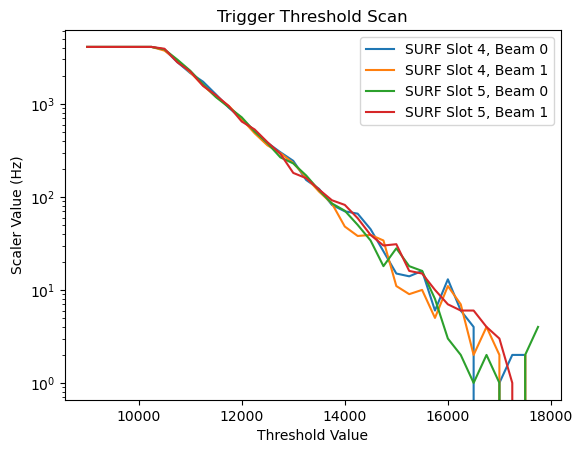

In [69]:
plt.plot(thresholds[4][0], scalers[4][0],label="SURF Slot 4, Beam 0")
plt.plot(thresholds[4][1], scalers[4][1],label="SURF Slot 4, Beam 1")
plt.plot(thresholds[5][0], scalers[5][0],label="SURF Slot 5, Beam 0")
plt.plot(thresholds[5][1], scalers[5][1],label="SURF Slot 5, Beam 1")
plt.title("Trigger Threshold Scan")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.yscale("log")
plt.legend()
# plt.savefig("threshold_scan_20250902_fine2.png")
plt.show()

In [ ]:
dB_value = 10
event_value = 0
surf_value = 25
channel_value = 0
plt.plot((1/3)*np.arange(len(all_data[dB_value][event_value][surf_value][channel_value])),all_data[dB_value][event_value][surf_value][channel_value])
plt.title(f"{dB_value}dB of Attenuation CW on SURF {surf_value} Channel {channel_value}\n Event {event_value}")
plt.xlabel("Time (ns)")
plt.ylabel("ADC Value")
plt.xlim(0,100)
plt.show()

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
for dB_value in range(0,15,5):
    plt.plot((1/3)*np.arange(len(all_data[dB_value][event_value][surf_value][channel_value])),all_data[dB_value][event_value][surf_value][channel_value], label = f"{dB_value} of attenuation")
plt.title(f"CW on SURF {surf_value} Channel {channel_value}\n Event {event_value}")
plt.xlabel("Time (ns)")
plt.ylabel("ADC Value")
plt.legend()
plt.xlim(0,20)
plt.show()

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
dB_value = 40
P_noise = np.sqrt(np.mean(all_data[dB_value][event_value][surf_value][channel_value] ** 2))*(np.sqrt(2))

In [ ]:
surf_value = 25
P_signals = []
all_snrs = []
mean_snrs = []
for dB_value in range(41):
    all_snrs.append([])
    for event_idx in range(10):
        P_signal = np.sqrt(np.mean(all_data[dB_value][event_idx][surf_value][channel_value] ** 2))*(np.sqrt(2))
        P_signals.append(P_signal)
        all_snrs[-1].append((P_signal-P_noise)/P_noise)
for idx in range(41):
    mean_snrs.append(np.mean(all_snrs[idx]))

In [ ]:
plt.plot(mean_snrs)
plt.title(f"CW on SURF {surf_value} Channel {channel_value}")
plt.xlabel("dB of attenuation on CW")
plt.ylabel("SNR")

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
dB_value = 0

yf = fft(all_data[dB_value][event_value][surf_value][channel_value])
N = len(all_data[dB_value][event_value][surf_value][channel_value])
xf = fftfreq(N, (1/(3e9)))[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linestyle="None", marker=".")
max_idx = np.argmax(np.abs(yf[0:N//2]))
print(max_idx)
print(xf[max_idx]/(1e6))
print(2*np.abs(yf[max_idx]/N))
print(np.sum(np.abs(yf[0:N//2])))
print(np.sum(2.0/N * np.abs(yf[0:N//2])))

print("******")
s = (2/N)*(np.abs(yf[max_idx]**2) + np.abs(yf[max_idx-1]**2) + np.abs(yf[max_idx+1]**2))
noise = (2/N)*(np.sum(np.abs(yf[:max_idx-1])**2) + np.sum(np.abs(yf[max_idx+2:]**2)))
print(s/noise)

In [ ]:
agc_pickles = []
for dB_idx in range(41):
    with open(f"AGC_test/082625_AGCtest_{dB_idx:d}dB/jjbAGC.pkl", 'rb') as file:
        agc_pickles.append(pickle.load(file))

In [ ]:
# Note: Index 0 is just the index of the trial

chan = 0
sqs = {}
for dB_idx in range(41):
    sqs[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        sqs[dB_idx].append(agc_pickles[dB_idx][i][chan][1])
        
gts = {}
for dB_idx in range(41):
    gts[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        gts[dB_idx].append(agc_pickles[dB_idx][i][chan][2])
        
lts = {}
for dB_idx in range(41):
    lts[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        lts[dB_idx].append(agc_pickles[dB_idx][i][chan][3])

scales = {}
for dB_idx in range(41):
    scales[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        scales[dB_idx].append(agc_pickles[dB_idx][i][chan][4]) 
        
offsets = {}
for dB_idx in range(41):
    offsets[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        offsets[dB_idx].append(agc_pickles[dB_idx][i][chan][5]) 
 

In [ ]:
mean_scales = []
for idx in range(41):
    mean_scales.append(np.mean(scales[idx]))

mean_offsets = []
for idx in range(41):
    mean_offsets.append(np.mean(offsets[idx]))

mean_sqs = []
for idx in range(41):
    mean_sqs.append(np.mean(sqs[idx]))

mean_gts = []
for idx in range(41):
    mean_gts.append(np.mean(gts[idx]))

mean_lts = []
for idx in range(41):
    mean_lts.append(np.mean(lts[idx]))
    

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(41), mean_sqs, linestyle="None", marker="o", label="Mean Square")
plt.axhspan(16,17, alpha=0.5, color="red", label = "Target")
plt.xlabel("CW Generator dB attenuation")
plt.ylabel("AGC Square Value")
plt.legend()
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(np.arange(41), mean_sqs, linestyle="-", marker=".", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(np.arange(41), mean_scales, linestyle="-", marker=".", color="green", label="AGC Scale Factor")
ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.set_xlabel("CW Generator dB of Attenuation")
ax2.set_ylabel("AGC Scale Factor")
ax2.legend()
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(mean_snrs, mean_sqs, linestyle="-", marker=".", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=0.2, alpha=0.5, color="grey")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(mean_snrs, mean_scales, linestyle="-", marker=".", color="green", label="AGC Scale Factor")
ax2.axvline(x=0.2, alpha=0.5, color="grey")
ax2.set_xlabel("SNR")
ax2.set_ylabel("AGC Scale Factor")
ax2.legend()

plt.savefig("Scale_factor_snr.png")

// The 'greater than' and 'less than' flags effectively

// calculate > 1.875*sigma and < -1.875*sigma.

^ From firmware

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(np.arange(41), mean_sqs, linestyle="None", marker="o", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(np.arange(41), mean_lts, linestyle=":", marker="o", color="C2", label="Less Than Fraction")
ax2.plot(np.arange(41), mean_gts, linestyle=":", marker=".", color="C3", label="Greater Than Fraction")
ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.axhline(y=0.03, alpha=0.8, color="purple", linestyle="--", label='"Expected" Tail Fraction')
ax2.set_xlabel("CW Generator dB of Attenuation")
ax2.set_ylabel("Tail Fraction")
ax2.legend()
plt.savefig("AGC_CW_Detection_dB.png")
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(mean_snrs, mean_sqs, linestyle="None", marker="o", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
# ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(mean_snrs, mean_lts, linestyle=":", marker="o", color="C2", label="Less Than Fraction")
ax2.plot(mean_snrs, mean_gts, linestyle=":", marker=".", color="C3", label="Greater Than Fraction")
ax2.axhline(y=0.03, alpha=0.8, color="purple", linestyle="--", label='"Expected" Tail Fraction')
# ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.set_xlabel("SNR")
ax2.set_ylabel("Tail Fraction")
ax2.legend()
plt.savefig("AGC_CW_Detection_SNR.png")
plt.show()

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(39), mean_lts, label="less than")
plt.plot(np.arange(39), mean_gts, label="greater than")
plt.xlabel("CW Generator dB")
plt.ylabel("AGC gt/lt value")
plt.legend()
plt.show()

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(39), mean_offsets)
plt.xlabel("CW Generator dB")
plt.ylabel("AGC Offsets")
plt.show()

In [ ]:
dB = 5
scales4 = []
scales5 = []
for chan_idx in range(8):
    scales4.append([])
    scales5.append([])
    for i in range(len(agc_pickles[dB])):
        scales4[chan_idx].append(agc_pickles[dB][i][chan_idx][4])
        scales5[chan_idx].append(agc_pickles[dB][i][chan_idx][9])

In [ ]:
plot_chan = 0
plt.plot(scales4[plot_chan], label="24")
plt.plot(scales5[plot_chan], label="25")
plt.legend()
plt.show()

In [ ]:
#  for i in range(8): #loop over channels                                                                                                                                                                                                                          sqr4=surf4.levelone.read(0x4004+0x400*i)/65536
#         gt4=surf4.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt4=surf4.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale4=surf4.levelone.read(0x4010+0x400*i)
#         offset4=surf4.levelone.read(0x4014+0x400*i)
#         done5=surf5.levelone.read(0x4000+0x4004*i)
#         sqr5=surf5.levelone.read(0x4004+0x400*i)/65536
#         gt5=surf5.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt5=surf5.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale5=surf5.levelone.read(0x4010+0x400*i)
#         offset5=surf5.levelone.read(0x4014+0x400*i)
#         thistime.append([i,sqr4,gt4,lt4,scale4,offset4,sqr5,gt5,lt5,scale5,offset5])
#     alltime.append(thistime)

In [ ]:
xs = np.linspace(0,100*np.pi, 5000)
ys = 3*np.sin(xs)
plt.plot(xs,ys)

In [ ]:
yf = fft(ys)
N = 5000
xf = fftfreq(N, (100*np.pi/5000))[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linestyle="None", marker=".")
max_idx = np.argmax(np.abs(yf[0:N//2]))
print(max_idx)
print(xf[max_idx]/(1e6))
print(2*np.abs(yf[max_idx]/N))
print(np.sum(np.abs(yf[0:N//2])))
print(np.sum(2.0/N * np.abs(yf[0:N//2])))